In [1]:
import os
os.chdir('/content')

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c playground-series-s4e9


  0% 0.00/7.84M [00:00<?, ?B/s]
100% 7.84M/7.84M [00:00<00:00, 83.5MB/s]


In [6]:
# prompt: unzip playground-series-s4e9.zip

import zipfile

with zipfile.ZipFile("/content/playground-series-s4e9.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv('/content/train.csv')

In [9]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [11]:
df.describe(include='all')

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,188533.000000,188533,188533,188533.000000,188533.000000,183450,188533,188533,188533,188533,186081,167114,1.885330e+05
unique,NaN,57,1897,NaN,NaN,7,1117,52,319,156,2,1,NaN
top,NaN,Ford,F-150 XLT,NaN,NaN,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN
freq,NaN,23088,2945,NaN,NaN,165940,3462,49904,48658,107674,144514,167114,NaN
mean,94266.000000,NaN,NaN,2015.829998,65705.295174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.387802e+04
std,54424.933488,NaN,NaN,5.660967,49798.158076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.881952e+04
min,0.000000,NaN,NaN,1974.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03
25%,47133.000000,NaN,NaN,2013.000000,24115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+04
50%,94266.000000,NaN,NaN,2017.000000,57785.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.082500e+04
75%,141399.000000,NaN,NaN,2020.000000,95400.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.990000e+04


Categorical Variables

In [12]:
df['brand'].nunique() #Holycow that's a lot

57

In [13]:
cat_columns = df.select_dtypes(include=['object']).columns
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [14]:
for col in cat_columns:
  print(f'{col}: {df[col].nunique()} unique values')

brand: 57 unique values
model: 1897 unique values
fuel_type: 7 unique values
engine: 1117 unique values
transmission: 52 unique values
ext_col: 319 unique values
int_col: 156 unique values
accident: 2 unique values
clean_title: 1 unique values


In [15]:
df[num_columns].corr()

,id,model_year,milage,price
id,1.000000,0.000076,-0.001834,-0.000877
model_year,0.000076,1.000000,-0.669936,0.231795
milage,-0.001834,-0.669936,1.000000,-0.283067
price,-0.000877,0.231795,-0.283067,1.000000


<Axes: >

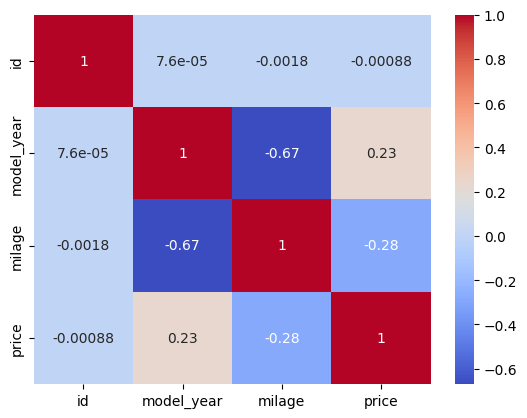

In [16]:
sns.heatmap(df[num_columns].corr(),cmap='coolwarm',annot=True)

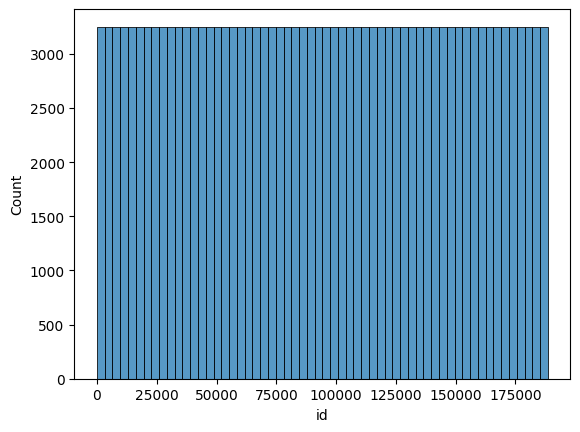

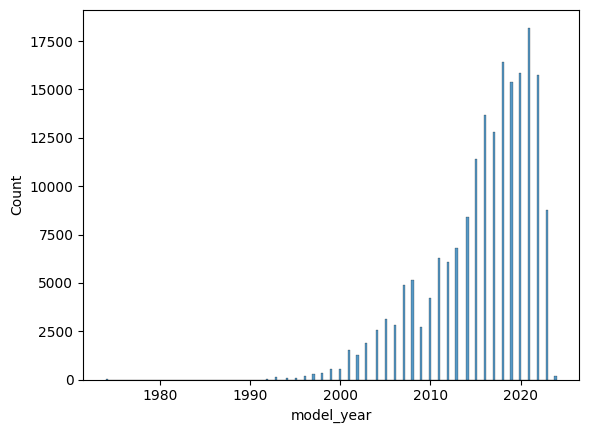

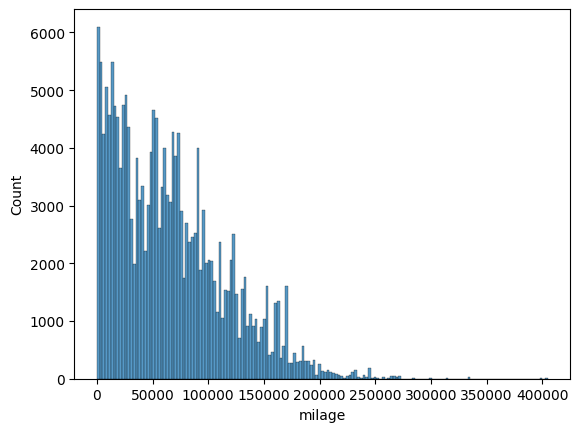

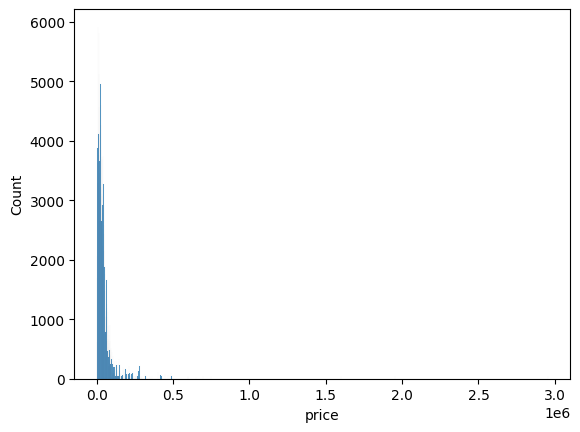

In [17]:
for col in num_columns:
  plt.figure()
  sns.histplot(df[col])

In [18]:
df['price'].describe()

,price
count,1.885330e+05
mean,4.387802e+04
std,7.881952e+04
min,2.000000e+03
25%,1.700000e+04
50%,3.082500e+04
75%,4.990000e+04
max,2.954083e+06


In [19]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

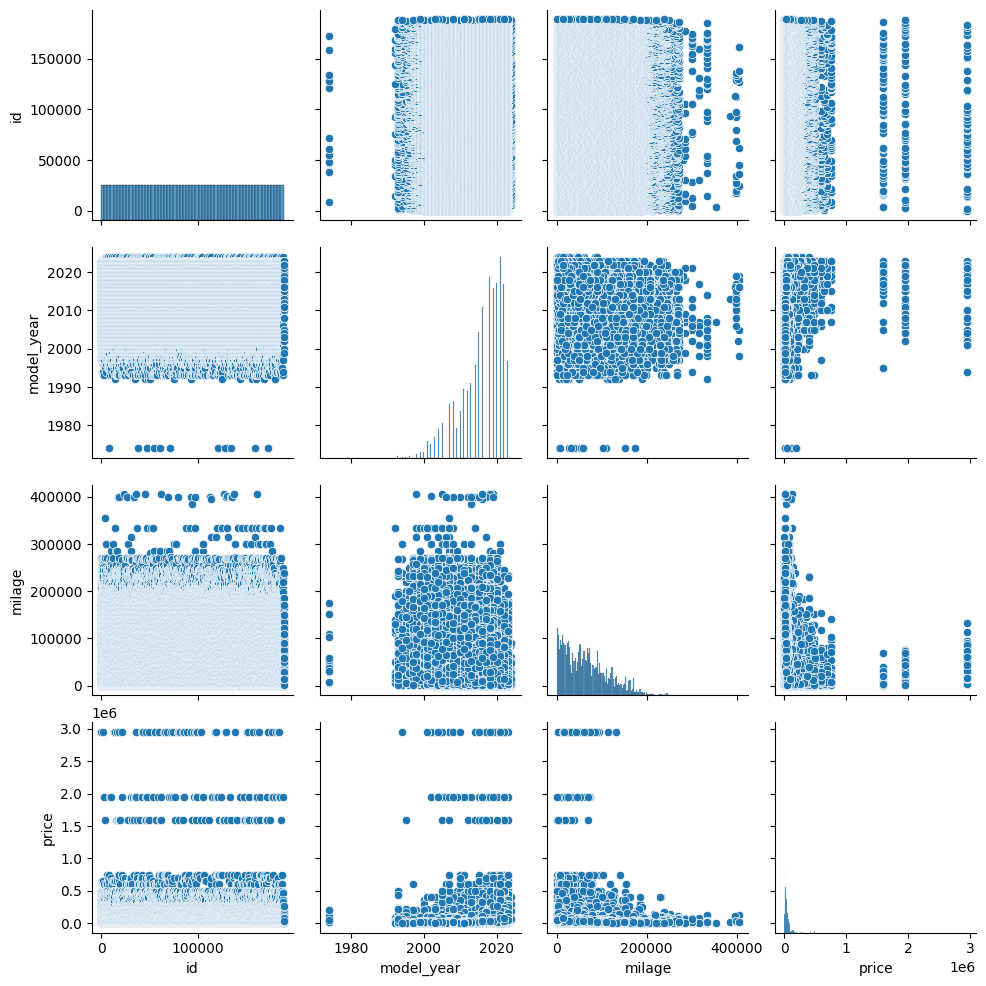

In [20]:
sns.pairplot(df)

<Axes: xlabel='milage', ylabel='price'>

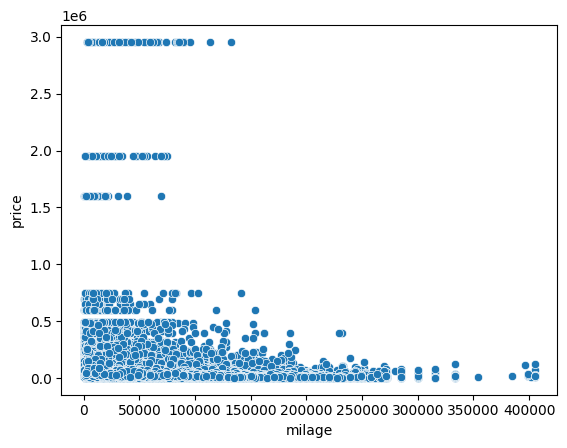

In [21]:
sns.scatterplot(x='milage',y='price',data=df)

In [22]:
df[df['price']>400000]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
220,220,Ford,F-150 XLT,2021,26315,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Agate Black Metallic,Black,None reported,Yes,2954083
296,296,Mercedes-Benz,S-Class S 550 4MATIC,2020,44300,Gasoline,449.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,489000
433,433,Ferrari,F12berlinetta Base,2017,25520,Gasoline,6.3L V12 48V GDI DOHC,7-Speed Automatic with Auto-Shift,Gray,BLACK,None reported,NaN,449995
580,580,Lamborghini,Urus Base,2021,2950,Gasoline,641.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Red,None reported,Yes,417500
1090,1090,Subaru,Outback Limited XT,2023,16146,Gasoline,2.5L H4 16V GDI DOHC,Automatic CVT,Crystal Black Silica,Graystone,None reported,Yes,479995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187217,187217,Porsche,911 Carrera,2005,5989,Gasoline,480.0HP 3.6L Flat 6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,At least 1 accident or damage reported,Yes,488880
187262,187262,Lamborghini,Gallardo LP570-4 Superleggera,2014,816,Gasoline,5.2L V10 40V GDI DOHC,6-Speed Manual,White,Nero Ade,None reported,NaN,489000
187693,187693,Lamborghini,Huracan LP580-2S,2020,73101,Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,Rosso Mars Metallic,Nero Ade,None reported,NaN,479995
187912,187912,Mercedes-Benz,S-Class S 580 4MATIC,2021,12771,Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,9-Speed Automatic,Red,Black,None reported,NaN,469900


In [23]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [24]:
X = df[['brand','model_year','milage','accident','clean_title']]

In [25]:
X.head()

,brand,model_year,milage,accident,clean_title
0,MINI,2007,213000,None reported,Yes
1,Lincoln,2002,143250,At least 1 accident or damage reported,Yes
2,Chevrolet,2002,136731,None reported,Yes
3,Genesis,2017,19500,None reported,Yes
4,Mercedes-Benz,2021,7388,None reported,Yes


In [26]:
X = pd.get_dummies(X,columns=['brand','model_year','accident','clean_title'],drop_first=True)

In [27]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# X['brand'] = le.fit_transform(X['brand'])

In [28]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# X = ohe.fit_transform(X)

In [29]:
X.head()

,milage,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,...,model_year_2016,model_year_2017,model_year_2018,model_year_2019,model_year_2020,model_year_2021,model_year_2022,model_year_2023,model_year_2024,accident_None reported
0,213000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,143250,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,136731,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,19500,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,7388,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, df['price'], test_size=0.3, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
pred = lr.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score

In [39]:
print(np.sqrt(mean_squared_error(y_test,pred)))
print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

67678.76600102165
21893.24848859944
0.13263235656830163


Using help from AI

In [59]:
df.isna().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0


In [58]:
#For cat columns, fill median. For cont columns, fill mean
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])
df['accident'] = df['accident'].fillna(df['accident'].mode()[0])
df['clean_title'] = df['clean_title'].fillna(df['clean_title'].mode()[0])

In [87]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [77]:
X = df[['brand','model_year','milage','accident','clean_title']]
y = df['price']

In [78]:
X.isna().sum()

,0
brand,0
model_year,0
milage,0
accident,0
clean_title,0


In [79]:
# num_columns = X.select_dtypes(include=['int64', 'float64']).columns #For now taking year as continuous
# cat_columns = X.select_dtypes(include=['object']).columns

In [80]:
numerical_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

In [86]:
# #Creating a custom function for pd.get_dummies
# def get_dummies(df,columns):
#   for col in columns:
#     df = pd.get_dummies(df,columns=[col],drop_first=True)
#   return df

In [88]:
# custom_cat_transformer = FunctionTransformer(get_dummies,validate=False)

In [98]:
#Doing this manually is better as brand will taken as continuous
cat_columns=['brand','model_year','accident','clean_title']
num_columns=['milage']


In [90]:
# preprocessor = ColumnTransformer(
#     transformers = [
#         ("num",numerical_transformer,num_columns),
#         ("cat",custom_cat_transformer,cat_columns)
#     ]
# )

In [91]:
# pipeline = Pipeline(
#     steps = [('transform',preprocessor),
#              ('model',LinearRegression())]) #Steps should be a LIST of TUPLES

In [94]:
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

In [104]:
X_encoded = pd.get_dummies(X,columns=cat_columns,drop_first=True) #Use columns option. Makes it very easier

In [106]:
scaler = StandardScaler()

In [107]:
X_encoded['milage'] = scaler.fit_transform(X_encoded[['milage']])

In [108]:
X_encoded.head()

,milage,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,...,model_year_2016,model_year_2017,model_year_2018,model_year_2019,model_year_2020,model_year_2021,model_year_2022,model_year_2023,model_year_2024,accident_None reported
0,2.957842,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1.557184,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.426276,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,-0.927854,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,-1.171076,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [109]:
y = np.log(df['price'])

(array([ 2023., 12902., 34906., 63446., 55494., 14910.,  3817.,   794.,
           93.,   148.]),
 array([ 7.60090246,  8.3306821 ,  9.06046174,  9.79024137, 10.52002101,
        11.24980065, 11.97958029, 12.70935993, 13.43913956, 14.1689192 ,
        14.89869884]),
 <BarContainer object of 10 artists>)

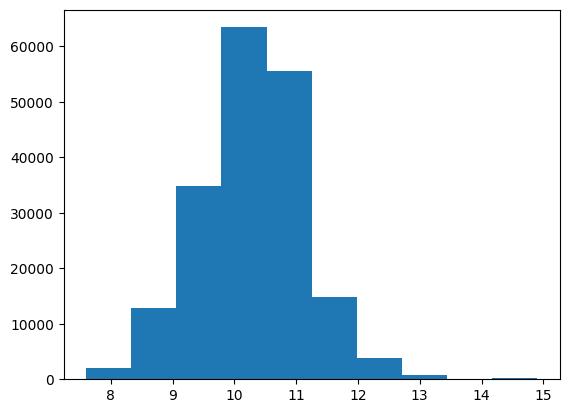

In [114]:
plt.hist(y)

(array([1.87299e+05, 8.82000e+02, 2.04000e+02, 0.00000e+00, 0.00000e+00,
        5.10000e+01, 4.70000e+01, 0.00000e+00, 0.00000e+00, 5.00000e+01]),
 array([2.0000000e+03, 2.9720830e+05, 5.9241660e+05, 8.8762490e+05,
        1.1828332e+06, 1.4780415e+06, 1.7732498e+06, 2.0684581e+06,
        2.3636664e+06, 2.6588747e+06, 2.9540830e+06]),
 <BarContainer object of 10 artists>)

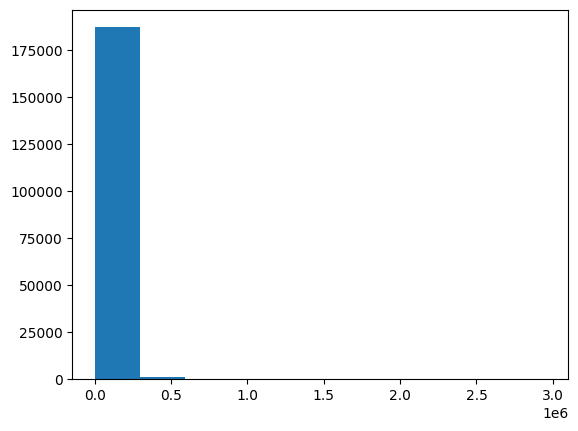

In [115]:
plt.hist(df['price'])


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [117]:
model = LinearRegression()

In [118]:
model.fit(X_train,y_train)

LinearRegression()

In [119]:
pred = model.predict(X_test)

In [120]:
r2_score(y_test,pred)

0.5968179712490882

In [ ]:
# prompt: improve the r square value

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ... (Your existing code for data loading and preprocessing) ...

# Separate features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore") # handle_unknown is crucial for unseen values in test set

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and the linear regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit and predict using the pipeline
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")